In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 3


In [3]:
texts = os.listdir('./datasample')
texts

['111.txt', '222.txt', '333.txt']

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','燈光秀','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','昂坪 360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','天際 100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','the one百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔號','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整','省錢','快速通關','住宿地','路線','風情','相當','龐大','一律','開始','插座','天王','寫','哈','車廂','包廂','TOP','Top','大量','排隊'])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Minerva\AppData\Local\Temp\jieba.cache
Loading model cost 0.735 seconds.
Prefix dict has been built succesfully.


In [6]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [7]:
stopwords = ['的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢','快速通關','處','世界','住宿地','住宿','地','地方','於','活動','著','含','更新','懶人包','私房','也','超詳細','規劃','又','這也','用品','路線','碧海','非常','風情','相當','龐大','一律','開始','插座','天王','寫','哈','機票','大補帖','總','顯示','目前','幾次', '車', '電子港簽','正式', '怎樣','車廂','搞定', '窺','包廂','無','和','游','TOP','Top','大量','排隊'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [8]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻


[('香港旅遊發展局', 2),
 ('網路', 1),
 ('地鐵資訊', 1),
 ('瘋制', 1),
 ('霸', 1),
 ('超熱門', 2),
 ('元有', 2),
 ('找景點', 2),
 ('大遊客', 2),
 ('項超', 2)]

In [9]:
corpus_cut = [jieba.lcut(t) for t in corpus]
# 斷完詞後的 list 
corpus_cut

[['香港',
  '旅遊景點',
  '有',
  '哪些',
  '香港',
  '去',
  '哪',
  '玩',
  '40',
  '大',
  '香港',
  '景點',
  '推薦',
  '香港',
  '景點',
  '地圖',
  '攻略',
  '有',
  '答案',
  '這些',
  '超人氣',
  '香港',
  '必去',
  '景點',
  '是',
  '波比',
  '根據',
  '香港旅遊發展局',
  '景點',
  '排名',
  '網路',
  '熱搜',
  '程度',
  '以及',
  '諸多',
  '香港',
  '自由行',
  '分享文',
  '精選',
  '出來',
  '的',
  '超人氣',
  '景點',
  '所有',
  '的',
  '香港',
  '景點',
  '都',
  '會',
  '附上',
  '香港',
  '地鐵資訊',
  '香港',
  '地圖',
  '優惠',
  '票券',
  '方便',
  '大家',
  '安排',
  '香港',
  '旅遊',
  '行程',
  '比價',
  '搶',
  '便宜',
  '門票',
  '趕緊',
  '拿',
  '著',
  '這份',
  '香港',
  '旅遊',
  '地圖',
  '大',
  '彙整',
  '含',
  '香港',
  '私房',
  '景點',
  '一起',
  '玩',
  '瘋制',
  '霸',
  '香港',
  '吧',
  '2019',
  '更新',
  '香港',
  '住宿',
  '懶人包',
  '香港',
  '超熱門',
  'Top',
  '15',
  '住宿',
  '總',
  '整理',
  '香港',
  '超詳細',
  '攻略',
  '行程',
  '自由行',
  '規劃',
  '大補帖',
  '機票',
  '最',
  '便宜',
  '機票',
  '5000',
  '元有',
  '找景點',
  '精選',
  '10',
  '大遊客',
  '必去',
  '景點',
  '必買',
  '28',
  '項超',
  '夯伴',
  '手禮',
  '大公',
  '開',
  '美食',
  '53

In [10]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [11]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\Minerva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,電影,列,營盤,設愛心,幣值,上班,海山樓,兩條,如果,禮吃貨,...,這是,半天,尖叫,交通卡,成功,即可,著海,護照,八達通,太平山夜景
0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [12]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,電影,列,營盤,設愛心,幣值,上班,海山樓,兩條,如果,禮吃貨,...,這是,半天,尖叫,交通卡,成功,即可,著海,護照,八達通,太平山夜景
0,0.137916,0.000000,0.000000,0.025906,0.000000,0.025906,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.025906,0.000000,0.025906,0.000000,0.000000,0.000000,0.000000,0.039405
1,0.012656,0.016642,0.000000,0.000000,0.016642,0.000000,0.033283,0.016642,0.025313,0.016642,...,0.000000,0.000000,0.000000,0.016642,0.000000,0.016642,0.000000,0.000000,0.033283,0.025313
2,0.000000,0.000000,0.044632,0.000000,0.000000,0.000000,0.000000,0.000000,0.016972,0.000000,...,0.022316,0.022316,0.000000,0.000000,0.000000,0.000000,0.022316,0.022316,0.000000,0.000000


In [13]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('電影', 7.0),
 ('列', 0.0),
 ('營盤', 0.0),
 ('設愛心', 1.0),
 ('幣值', 0.0),
 ('上班', 1.0),
 ('海山樓', 0.0),
 ('兩條', 0.0),
 ('如果', 0.0),
 ('禮吃貨', 0.0)]

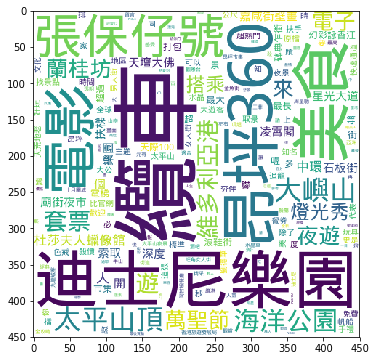

In [14]:
linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=450, width=450)



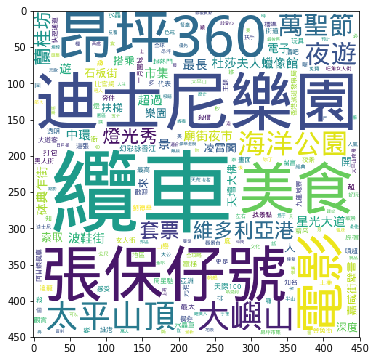

In [15]:
#修正過後
plt.figure(figsize=(15, 6))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=450, width=450)

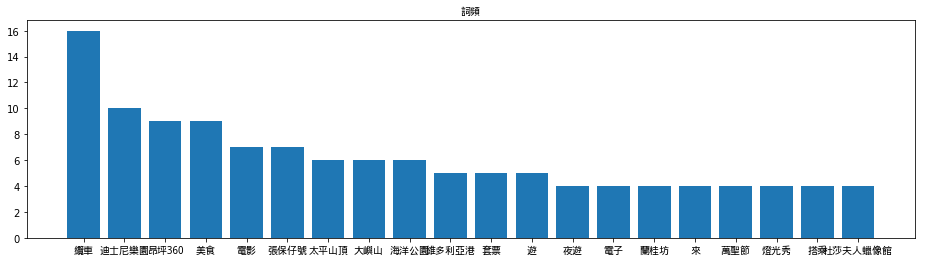

In [16]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

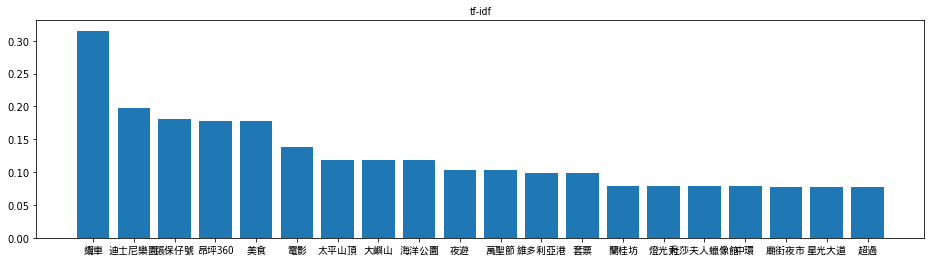

In [17]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")